### TensorFlow Hub
1- Magenta’s Arbitrary Image Stylization network

### What is Magenta ?
 1- Project BY Google 
 
 2- SUpports Python and Javascript
 
 3- Provide ML Solutions to Artists and Musicians
 
 4- Using Magenta, we can create songs, Sounds and Paintings.
 
Magenta-  we will use a network trained and maintained by the Magenta team for Arbitrary Image Stylization.



In [37]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub  # 

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())

TF Version:  2.2.1
TF-Hub version:  0.7.0
Eager mode enabled:  True
GPU available:  False


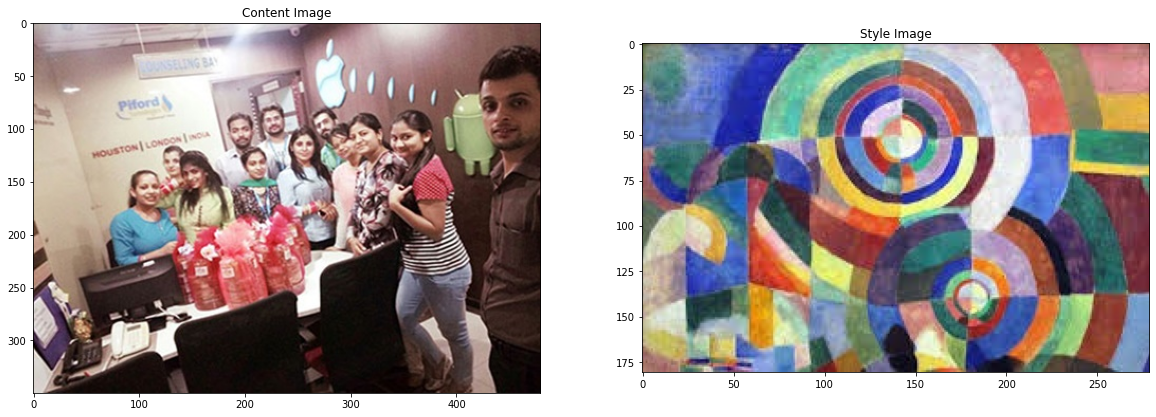

In [38]:
import tensorflow_hub as hub

content_path = 'contentimg.jpg'
style_path = 'a.jpg'

# Load the content and style images
content = plt.imread(content_path)
style = plt.imread(style_path)

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Content and style images side-by-side
ax1.imshow(content)
ax1.set_title('Content Image')
ax2.imshow(style)
ax2.set_title('Style Image')
plt.show()

In [40]:
# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_path)
style_image = plt.imread(style_path)

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

# Optionally resize the images. 
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

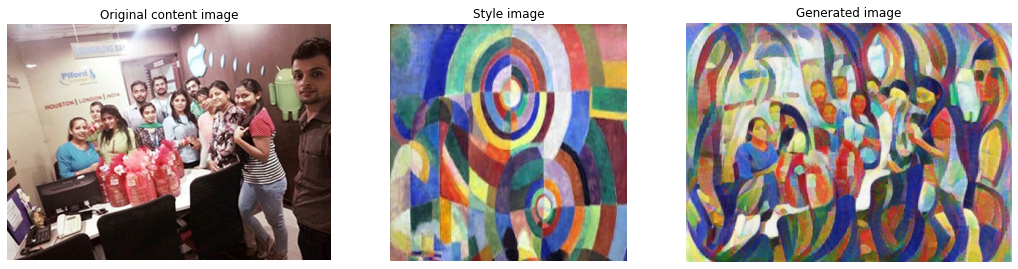

In [41]:
# Visualize input images and the generated stylized image.

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()


show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Generated image'])